set GPU

edit-Notebook settings- GPU
 Runtime-Change runtime


In [1]:
!pip install -q keras

In [2]:
import keras

Import libraries and modules

In [3]:
import numpy as np
np.random.seed(123)  # for reproducibility

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils #Converts a class vector (integers) to binary class matrix
from keras.datasets import mnist

Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

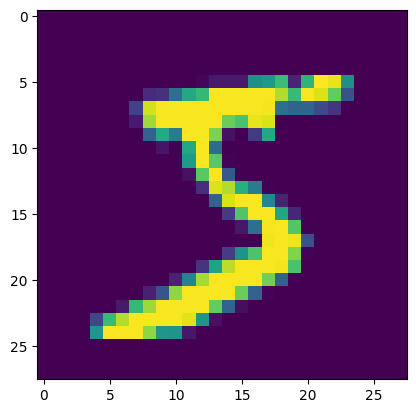

In [7]:
#Plotting first sample of X_trainPython
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

In [8]:
#Reshape input data to one chaneel
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [10]:
X_train.shape

(60000, 1, 28, 28)

In [11]:
#Convert data type and normalize valuesPython
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [12]:
print(y_train[:10])
y_train.shape

[5 0 4 1 9 2 1 3 1 4]


(60000,)

And there's the problem. The y_train and y_test data are not split into 10 distinct class labels, but rather are represented as a single array with the class values.

In [13]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10) #Converts a class vector (integers) to binary class matrix
Y_test = np_utils.to_categorical(y_test, 10)

In [14]:
Y_train.shape

(60000, 10)

In [15]:
#Define model architecture
model = Sequential()
 #(1, 28, 28) that corresponds to  the (depth, width, height) of each digit image.
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28),data_format='channels_first'))
model.add(Convolution2D(32, 3, 3, activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))
#Dropout layer we just added. This is a method for regularizing our model in order to prevent overfitting

model.add(Flatten())

#For Dense layers, the first parameter is the output size of the layer.
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
#final layer has an output size of 10, corresponding to the 10 classes of digits

In [16]:
#Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [17]:
#  Fit model on training data
history=model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1,validation_data=(X_test, Y_test))


Epoch 1/10
1875/1875 [==============================] - 20s 5ms/step - loss: 0.6030 - accuracy: 0.8135 - val_loss: 0.2342 - val_accuracy: 0.9266
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3047 - accuracy: 0.9086 - val_loss: 0.1754 - val_accuracy: 0.9457
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2576 - accuracy: 0.9230 - val_loss: 0.1527 - val_accuracy: 0.9499
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2341 - accuracy: 0.9296 - val_loss: 0.1343 - val_accuracy: 0.9576
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2211 - accuracy: 0.9350 - val_loss: 0.1270 - val_accuracy: 0.9584
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2093 - accuracy: 0.9371 - val_loss: 0.1290 - val_accuracy: 0.9576
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1994 - accuracy: 0.9397 - val_loss: 0.1229 - val_accuracy

In [18]:
#Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11392795294523239
Test accuracy: 0.9635000228881836


Prediction





In [20]:
# Predict on the first 5 test images.
predictions = model.predict(X_test[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(Y_test[:5]) # [7, 2, 1, 0, 4]

1/1 [==============================] - 0s 17ms/step
[7 2 1 0 4]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
